In [1]:
from keras.datasets import reuters
from keras.utils import to_categorical 
import numpy as np

word_dict = reuters.get_word_index()
word_dict = {value:key for key, value in word_dict.items()}

WORDS_COUNT = 15000

def decode(numbers_sequence):
  words_sequence = [word_dict.get(number - 3, 'UNKNOWN_WORD') for number in numbers_sequence]
  return ' '.join(words_sequence)

def vectorize_sequences(sequences, dimensions = WORDS_COUNT):
  result = np.zeros((len(sequences), dimensions))
  for sequence, vector in zip(sequences, result):
    vector[sequence] = 1
  
  return result

557056/550378 [==============================] - 0s 0us/step


## Preraring the data

In [65]:
(train_samples, train_labels), (test_samples, test_labels) = reuters.load_data(num_words=WORDS_COUNT)

train_samples = vectorize_sequences(train_samples)
test_samples = vectorize_sequences(test_samples)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


## Building up the network

In [89]:
from keras import models, layers, optimizers, losses, metrics

EPOCHS = 17

network = models.Sequential()
network.add(layers.Dense(200, 'sigmoid', input_shape=(WORDS_COUNT,)))
network.add(layers.Dense(100, 'sigmoid'))
# network.add(layers.Dense(100, 'sigmoid'))
# network.add(layers.Dense(100, 'sigmoid'))
network.add(layers.Dense(46, 'softmax'))

network.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy, metrics=['accuracy'])

history = network.fit(train_samples, train_labels, batch_size=256, epochs=EPOCHS, validation_split=0.20)

Epoch 1/17
29/29 [==============================] - 3s 103ms/step - loss: 2.8728 - accuracy: 0.3200 - val_loss: 2.0273 - val_accuracy: 0.4914
Epoch 2/17
29/29 [==============================] - 3s 96ms/step - loss: 1.9144 - accuracy: 0.5445 - val_loss: 1.6923 - val_accuracy: 0.6305
Epoch 3/17
29/29 [==============================] - 3s 96ms/step - loss: 1.6081 - accuracy: 0.6499 - val_loss: 1.4709 - val_accuracy: 0.6778
Epoch 4/17
29/29 [==============================] - 3s 95ms/step - loss: 1.3425 - accuracy: 0.7094 - val_loss: 1.3304 - val_accuracy: 0.6945
Epoch 5/17
29/29 [==============================] - 3s 96ms/step - loss: 1.1523 - accuracy: 0.7389 - val_loss: 1.2263 - val_accuracy: 0.7179
Epoch 6/17
29/29 [==============================] - 3s 95ms/step - loss: 1.0070 - accuracy: 0.7707 - val_loss: 1.1685 - val_accuracy: 0.7462
Epoch 7/17
29/29 [==============================] - 3s 96ms/step - loss: 0.9495 - accuracy: 0.7973 - val_loss: 1.1345 - val_accuracy: 0.7518
Epoch 8/17
2

## Plotting the network performance

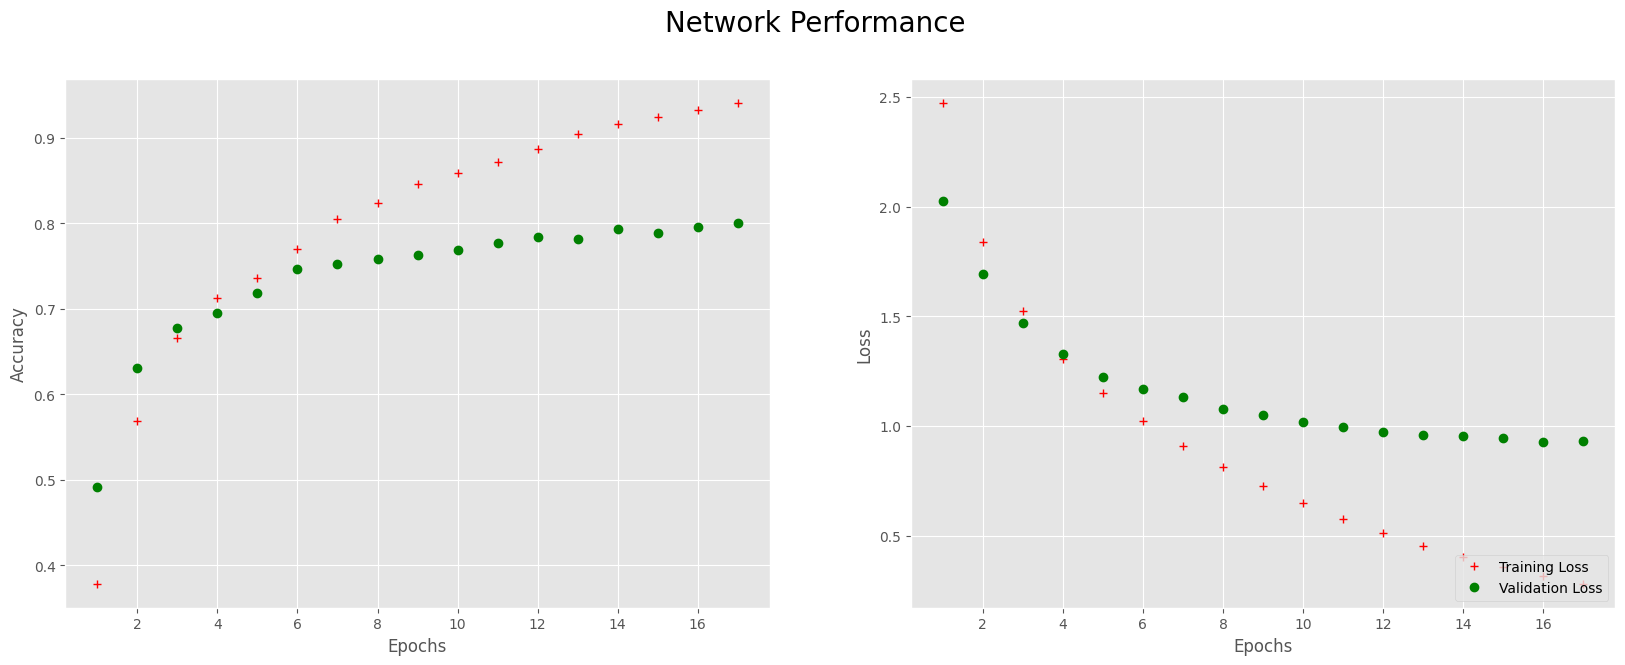

In [90]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

hstry = history.history

training_accuracy = hstry['accuracy']
validation_accuracy = hstry['val_accuracy']
training_loss = hstry['loss']
validation_loss = hstry['val_loss']

epochs = range(1, EPOCHS+1)

fig = plt.figure(figsize=(20,7), dpi=100)
fig.suptitle('Network Performance', fontsize=20)

plt.subplot(1,2,1)
plt.plot(epochs, training_accuracy, 'r+', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'go', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, training_loss, 'r+', label='Training Loss')
plt.plot(epochs, validation_loss, 'go', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(loc='lower right')

plt.show()

In [91]:
network.evaluate(test_samples, test_labels)

71/71 [==============================] - 1s 7ms/step - loss: 0.9604 - accuracy: 0.7823


[0.9603985548019409, 0.7822796106338501]

In [68]:
predictions = network.predict(test_samples[:10])
np.argmax(predictions[0])

4

In [23]:
import copy
(train_samples, train_labels), (test_samples, test_labels) = reuters.load_data(num_words=WORDS_COUNT)



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


0.18121104185218165

In [62]:
i = 0
while True:
  i+=1
  test_labels_copy = copy.copy(test_labels)
  np.random.shuffle(test_labels_copy)
  hits_array = test_labels_copy == test_labels
  s=sum(hits_array)/len(test_labels)
  if s > 0.25:
    print(s)
    break

KeyboardInterrupt: ignored

In [63]:
i

7115